In [176]:
import pandas as pd
from matplotlib import pyplot as plt
%matplotlib inline

In [177]:
df = pd.read_csv("insurance_data.csv")
df.head()

,age,bought_insurance
0,22,0
1,25,0
2,47,1
3,52,0
4,46,1


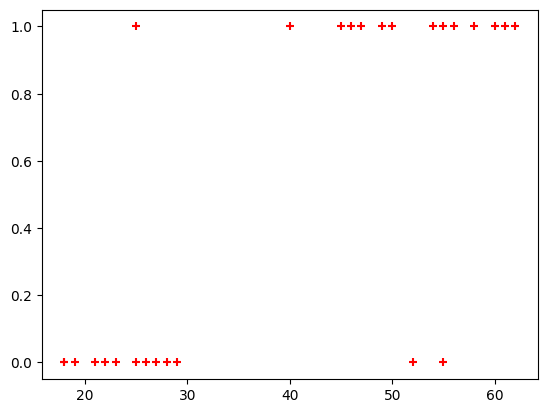

In [178]:
plt.scatter(df.age,df.bought_insurance,marker='+',color='red')

In [179]:
from sklearn.model_selection import train_test_split

In [180]:
X_train, X_test, y_train, y_test = train_test_split(df[['age']],df.bought_insurance,train_size=0.9)

In [181]:
X_test

,age
21,26
24,50
10,18


In [182]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()

In [183]:
model.fit(X_train, y_train)

LogisticRegression()

In [184]:
X_test

,age
21,26
24,50
10,18


In [185]:
y_predicted = model.predict(X_test)

In [186]:
model.predict_proba(X_test)

array([[0.83039947, 0.16960053],
       [0.19537396, 0.80462604],
       [0.9302002 , 0.0697998 ]])

In [187]:
model.score(X_test,y_test)

1.0

In [188]:
y_predicted

array([0, 1, 0])

In [189]:
X_test

,age
21,26
24,50
10,18


<h2 style="color:purple">Exercise</h2>

Download employee retention dataset from here: https://www.kaggle.com/giripujar/hr-analytics.
1. Now do some exploratory data analysis to figure out which variables have direct and clear impact on employee retention (i.e. whether they leave the company or continue to work)
2. Plot bar charts showing impact of employee salaries on retention
3. Plot bar charts showing corelation between department and employee retention
4. Now build logistic regression model using variables that were narrowed down in step 1
5. Measure the accuracy of the model

In [190]:
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

hr_df = pd.read_csv("HR_comma_sep_exercise.csv")
hr_df.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


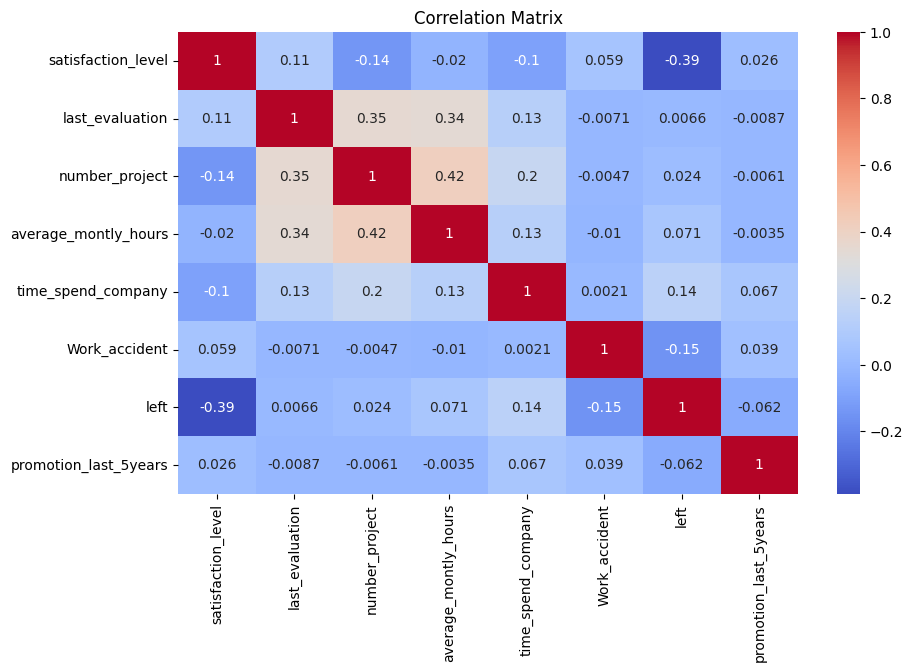

In [191]:
# plt.bar(hr_df.time_spend_company, hr_df.salary)
# Step 1: Show correlation of all numerical columns with 'left'
corr_matrix = hr_df.corr(numeric_only=True)

# Visualize
plt.figure(figsize=(10,6))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm")
plt.title("Correlation Matrix")
plt.show()

In [192]:
# Group by 'left' and find average values
grouped_means = hr_df.groupby('left').mean(numeric_only=True)

print(grouped_means)


      satisfaction_level  last_evaluation  number_project  \
left                                                        
0               0.666810         0.715473        3.786664   
1               0.440098         0.718113        3.855503   

      average_montly_hours  time_spend_company  Work_accident  \
left                                                            
0               199.060203            3.380032       0.175009   
1               207.419210            3.876505       0.047326   

      promotion_last_5years  
left                         
0                  0.026251  
1                  0.005321  


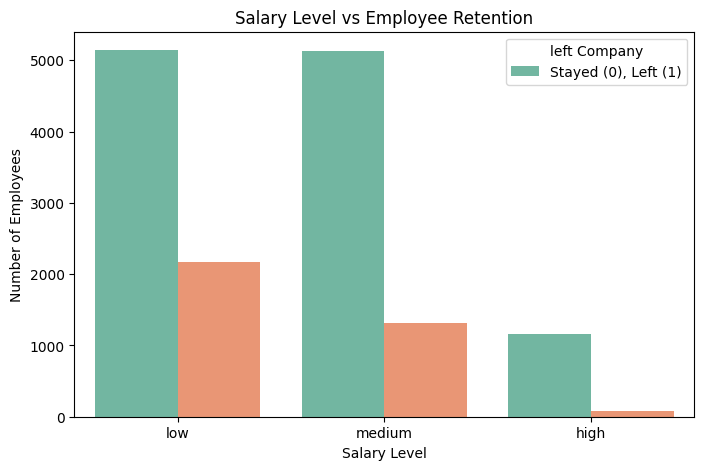

In [193]:
plt.figure(figsize=(8,5))
sns.countplot(data= hr_df, x= 'salary', hue='left', palette='Set2')
plt.title("Salary Level vs Employee Retention")
plt.xlabel("Salary Level")
plt.ylabel("Number of Employees")
plt.legend(title= "left Company", labels=["Stayed (0), Left (1)"])
plt.show()

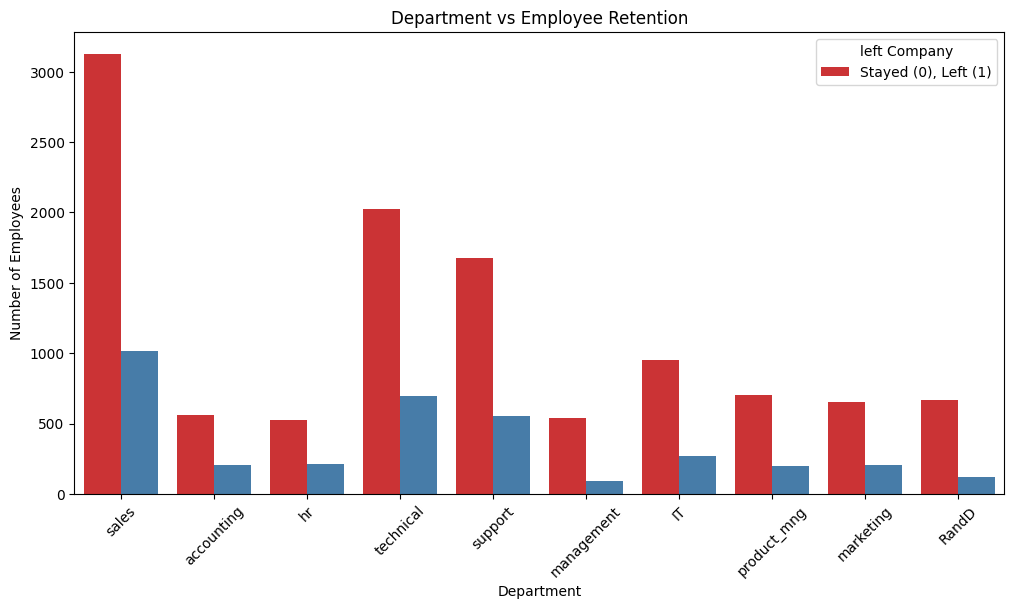

In [194]:
plt.figure(figsize=(12,6))
sns.countplot(data= hr_df, x= 'Department', hue='left', palette='Set1')
plt.title("Department vs Employee Retention")
plt.xlabel("Department")
plt.ylabel("Number of Employees")
plt.legend(title= "left Company", labels=["Stayed (0), Left (1)"])
plt.xticks(rotation=45)
plt.show()

In [195]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score

# Step 1: Copy selected features
df_model = hr_df[['satisfaction_level','time_spend_company', 'Work_accident', 'promotion_last_5years', 'salary', 'left']]

# Step 2: Encode salary (categorical to numeric)
label_encoder = LabelEncoder()
df_model['salary'] = label_encoder.fit_transform(df_model['salary'])

# Step 3: Split data into X (features) and y (target)
X = df_model.drop('left', axis=1)
y = df_model['left']

# Step 4: Train-test split
X_train, X_test, y_train, y_test = train_test_split(X,y,train_size=0.8, test_size=0.2, random_state=42)

# Step 5: Train logistic regression model
model = LogisticRegression()
model.fit(X_train, y_train)

# Step 6: Predict 
y_pred = model.predict(X_test)

# Step 7: Measure accuracy
# accuracy = accuracy_score(y_test, y_pred)
# print(f"Model Accuracy: {accuracy:.2f}")
accuracy =  model.score(X_test, y_test)
print(f"Model Accuracy: {accuracy:.2f}")

Model Accuracy: 0.75


C:\Users\Abdul Ahad\AppData\Local\Temp\ipykernel_8300\1449579549.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_model['salary'] = label_encoder.fit_transform(df_model['salary'])
